# Task 1: 20 data science questions that you can explore using your dataset of 300 students with columns for name, university, and CGPA:

In [33]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv("students_data.csv", header=None)
df

,0,1,2
0,Oliver Thompson,Harvard University,2
1,Emma Johnson,Stanford University,3.82
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
3,Olivia Brown,University of Cambridge,2.93
4,Noah Davis,University of Oxford,3.3
...,...,...,...
295,Max Turner,University of Amsterdam,3.09
296,Brooklyn Wilson,University of Copenhagen,3.23
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.2
298,Gabriella Lee,King's College London,2.5


In [44]:
column_names = ['Name', 'University', 'CGPA']
df.columns = column_names

In [45]:
df

,Name,University,CGPA
0,Oliver Thompson,Harvard University,2
1,Emma Johnson,Stanford University,3.82
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
3,Olivia Brown,University of Cambridge,2.93
4,Noah Davis,University of Oxford,3.3
...,...,...,...
295,Max Turner,University of Amsterdam,3.09
296,Brooklyn Wilson,University of Copenhagen,3.23
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.2
298,Gabriella Lee,King's College London,2.5


## Data Pre-processing

In [47]:
df['CGPA'].replace('Annual ', np.nan, inplace=True)

In [55]:
df['CGPA'].replace('2.6/4', '2.6', inplace=True)
df['CGPA'].replace('3.93/4', '3.93', inplace=True)

In [63]:
df['CGPA'].replace('7.5', np.nan, inplace=True)

In [67]:
df['CGPA'].replace('3.08(updated after 4 semester).', 3.08, inplace=True)
df['CGPA'].replace('3.21 (6th semester completed)', 3.21, inplace=True)

In [65]:
df.isna().sum()

Name           0
University     0
CGPA          13
dtype: int64

In [68]:
df['CGPA'].fillna(df.CGPA.astype(float).mean(), inplace=True)

In [69]:
df.isna().sum()

Name          0
University    0
CGPA          0
dtype: int64

## 1. What are the top 5 universities with the highest average CGPA?

In [90]:
top_5 = df.groupby('University')['CGPA'].mean().sort_values(ascending=False).head(5)
top_5

University
University of Michigan, Ann Arbor                            3.433333
Swiss Federal Institute of Technology Zurich (ETH Zurich)    3.410000
Massachusetts Institute of Technology (MIT)                  3.395000
New York University (NYU)                                    3.386667
University of Toronto                                        3.380758
Name: CGPA, dtype: float64

## 2. Is there a correlation between the CGPA and the length of the student's name?

In [93]:
df['Name_Length'] = df['Name'].str.len()
df

,Name,University,CGPA,Name_Length
0,Oliver Thompson,Harvard University,2.00,15
1,Emma Johnson,Stanford University,3.82,12
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.60,10
3,Olivia Brown,University of Cambridge,2.93,12
4,Noah Davis,University of Oxford,3.30,10
...,...,...,...,...
295,Max Turner,University of Amsterdam,3.09,10
296,Brooklyn Wilson,University of Copenhagen,3.23,15
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.20,13
298,Gabriella Lee,King's College London,2.50,13


In [94]:
df['CGPA'].corr(df.Name_Length)

# A positive value close to 1 indicates a strong positive correlation 
# (as CGPA increases, the length of the student's name tends to increase). 

0.01343137780870543

## 3. How does the CGPA vary across different universities?

In [108]:
cgpa_stats = df.groupby('University')['CGPA'].agg(['mean', 'median', 'std', 'min', 'max'])
cgpa_stats

,mean,median,std,min,max
University,,,,,
California Institute of Technology (Caltech),2.996667,2.950,0.411987,2.61,3.43
Columbia University,3.006667,2.845,0.344654,2.70,3.59
Cornell University,3.141667,3.400,0.549014,2.24,3.66
Harvard University,2.810000,2.975,0.528394,2.00,3.50
Imperial College London,3.138333,3.055,0.381650,2.70,3.79
...,...,...,...,...,...
University of Washington,3.038333,3.090,0.352387,2.50,3.58
University of Western Australia,3.110000,3.260,0.359305,2.70,3.37
University of Wisconsin-Madison,2.951667,2.925,0.373117,2.40,3.40


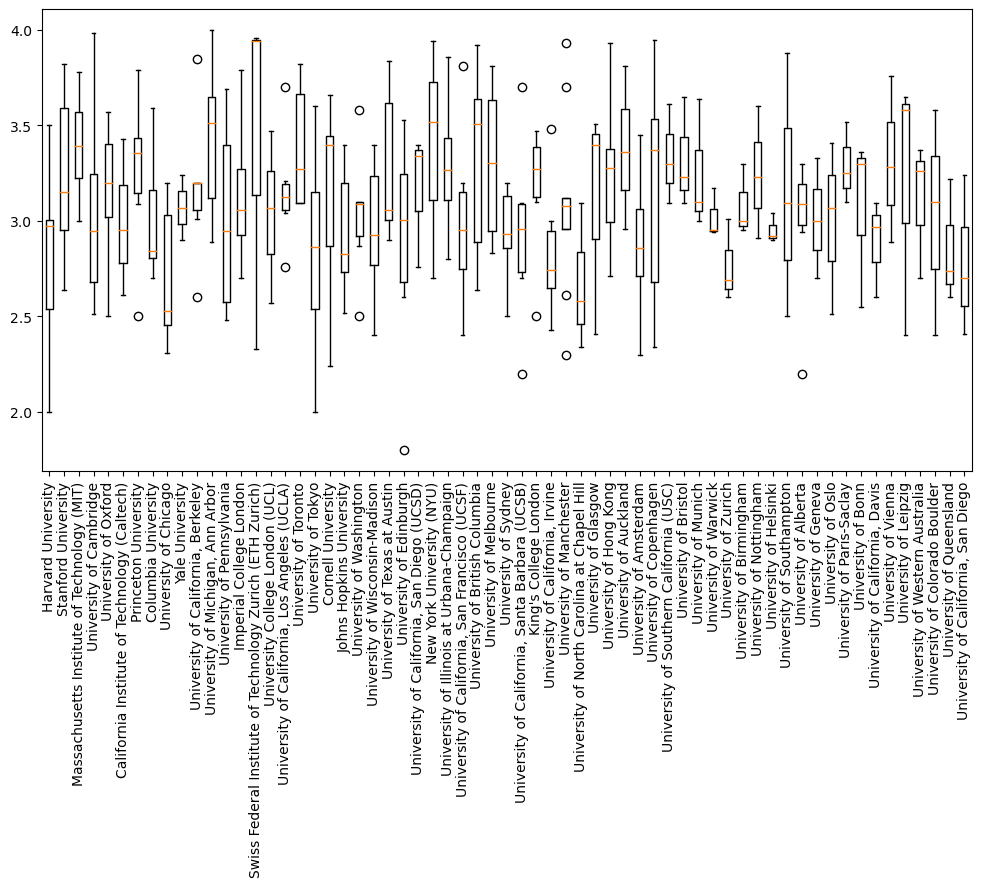

In [113]:
# box plot for cgpa stats
data_plot = [df[df.University == uni]['CGPA'] for uni in df.University.unique()]
plt.figure(figsize=(12, 6))
plt.boxplot(data_plot, labels=df.University.unique())
plt.xticks(rotation=90)
plt.show()


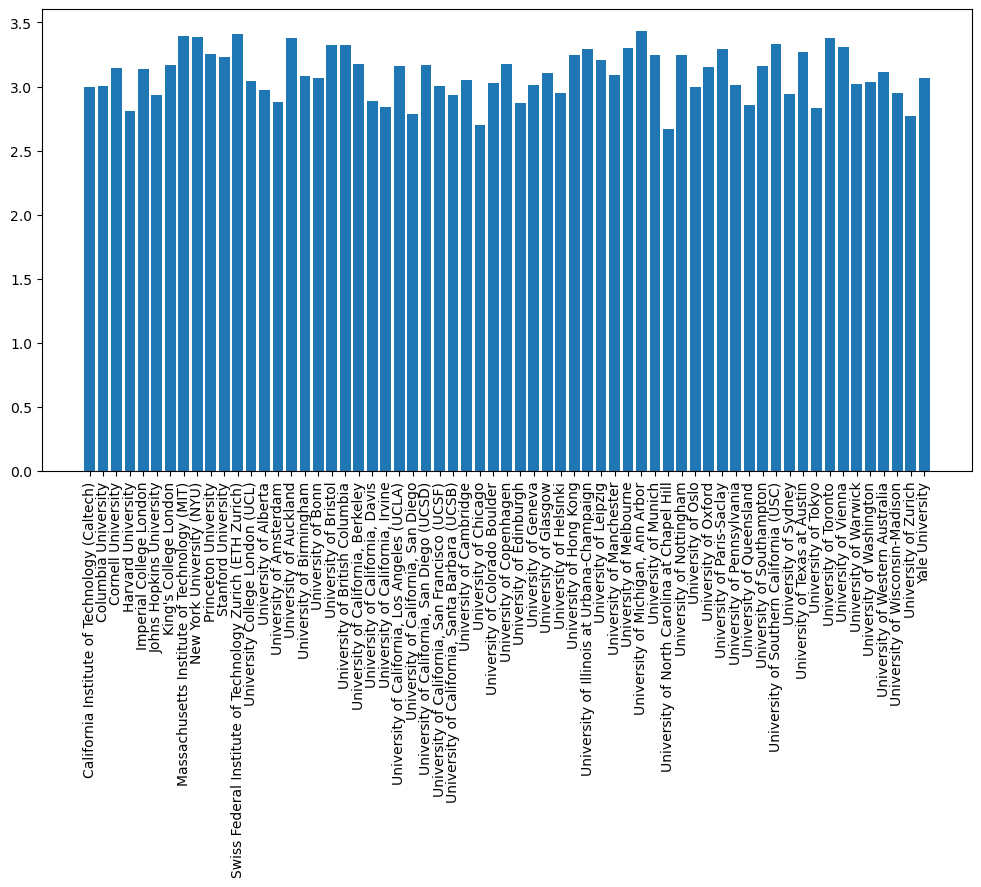

In [106]:
# plot mean
plt.figure(figsize=(12,6))
plt.bar(cgpa_stats.index, cgpa_stats['mean'])
plt.xticks(rotation=90)
plt.show()

## 4. Can we predict a student's CGPA based on the length of their name using linear regression?

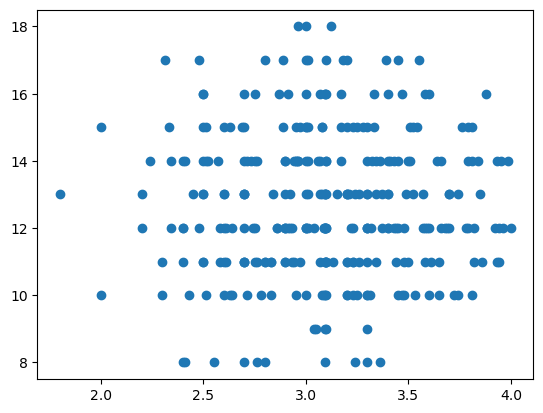

In [116]:
plt.scatter(df.CGPA, df.Name_Length)
plt.show()

In [138]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['Name_Length']], df.CGPA)

new_data = pd.DataFrame(df.Name_Length)
predictions = model.predict(new_data)

print(predictions)

[3.09840698 3.09047803 3.08519207 3.09047803 3.08519207 3.08519207
 3.09840698 3.10369295 3.09312102 3.09047803 3.09312102 3.09047803
 3.08254908 3.09840698 3.09840698 3.09840698 3.095764   3.09312102
 3.08519207 3.09047803 3.095764   3.095764   3.09312102 3.09047803
 3.08519207 3.09047803 3.09312102 3.09312102 3.09840698 3.09312102
 3.08783505 3.09047803 3.09840698 3.08519207 3.08519207 3.09047803
 3.09047803 3.095764   3.08519207 3.095764   3.09840698 3.095764
 3.08783505 3.10104996 3.095764   3.095764   3.095764   3.09840698
 3.09047803 3.09047803 3.10104996 3.08783505 3.10104996 3.095764
 3.08783505 3.08783505 3.08783505 3.08783505 3.09840698 3.08783505
 3.09312102 3.09047803 3.08783505 3.09047803 3.09047803 3.10369295
 3.08783505 3.09312102 3.0799061  3.0799061  3.095764   3.09047803
 3.095764   3.09312102 3.09047803 3.08519207 3.09312102 3.095764
 3.09312102 3.10104996 3.08783505 3.09312102 3.08783505 3.09840698
 3.08783505 3.10633593 3.08783505 3.09047803 3.095764   3.09047803
 

## 5. Which university has the highest number of students with a CGPA above a certain threshold?

In [174]:
threshold = 3

df.loc[df.CGPA > threshold].groupby("University").value_counts().idxmax()

('University of California, Berkeley', 'Aria Clark', 3.2, 10)

## 6. Can we identify any outliers in the CGPA distribution within each university?

In [175]:
df.describe()

,CGPA,Name_Length
count,300.000000,300.000000
mean,3.092275,12.680000
std,0.428416,2.177169
min,1.800000,8.000000
25%,2.795000,11.000000
50%,3.092275,12.000000
75%,3.400000,14.000000
max,4.000000,18.000000


<Axes: >

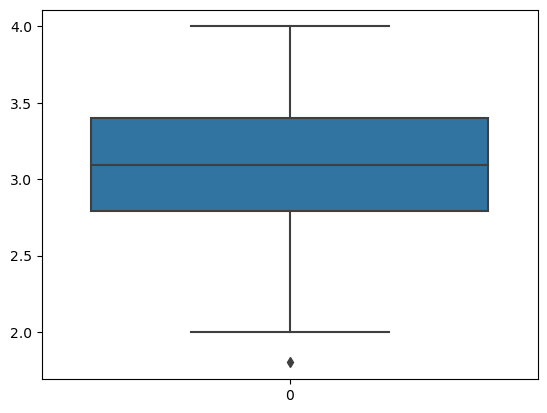

In [177]:
import seaborn as sns

sns.boxplot(df.CGPA)

In [194]:
# as we can see there is one outlier in lower boundary

# IQR
Q1 = df.CGPA.quantile(0.25)
Q3 = df.CGPA.quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
lower_array = df.loc[df.CGPA <= lower_bound]

df.drop(index=lower_array.index, inplace=True)

<Axes: >

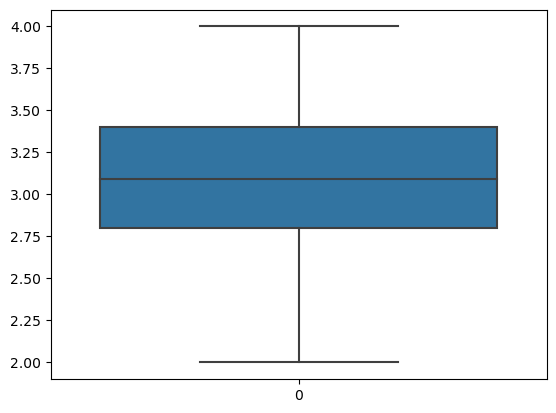

In [195]:
# outlier emoved
sns.boxplot(df.CGPA)

## 7. Can we cluster students based on their CGPA using k-means clustering?